<h3 style='color:blue' align='center'>Customer Churn Prediction Using Artificial Neural Network (ANN), Logistics Regression , GradientBoostingClassifier, GaussianNB</h3>

# https://medium.com/swlh/churn-prediction-using-machine-learning-25c856201884
#https://towardsdatascience.com/predict-customer-churn-the-right-way-using-pycaret-8ba6541608ac

Customer churn prediction is to measure why customers are leaving a business. In this tutorial we will be looking at customer churn in telecom business. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model

In [277]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix , classification_report

import seaborn as sn

**Load the data**

In [278]:
# Lets look at glimpse of the data
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5484,4419-UJMUS,Male,0,Yes,Yes,69,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Two year,Yes,Electronic check,99.35,6856.45,No
1565,6968-GMKPR,Female,0,No,No,55,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.55,4509.5,No
2160,7101-HRBLJ,Female,0,Yes,Yes,72,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),83.70,6096.9,No
5256,1527-SXDPN,Male,0,Yes,Yes,52,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),96.25,4990.25,Yes
4683,9360-OMDZZ,Male,0,No,No,24,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.10,2322.85,No


In [279]:
#Check the null values 
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [280]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [281]:
#Drop customerID column
df.drop('customerID', axis='columns', inplace=True)

In [282]:
# Check the type of the data 
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [283]:
#check TotalCharges field type 
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [284]:
#Convert TotalCharges to Float
pd.to_numeric(df.TotalCharges, errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [285]:
#Check null values in TotalCharges
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape

(11, 20)

In [286]:
#Remove blank string TotalCharges
df=df[df.TotalCharges!=' ']
df.shape

(7032, 20)

In [287]:
#Convert all TotalCharges to float
df.TotalCharges  = pd.to_numeric(df.TotalCharges)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [288]:
df[df.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


**Data Visualization**

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(array([[ 877.,  259.,  159.,  114.,  102.,   98.,   72.,   70.,   46.,
           72.],
        [ 847.,  476.,  402.,  424.,  371.,  346.,  380.,  425.,  455.,
         1037.]]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <a list of 2 Lists of Patches objects>)

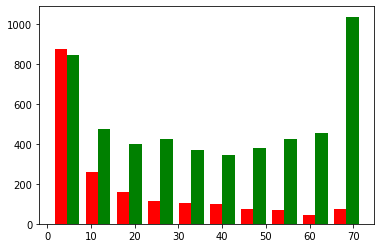

In [289]:
#Data Visualization corrsponding to Churn field
tenure_churn_yes = df[df.Churn=='Yes'].tenure
tenure_churn_no = df[df.Churn=='No'].tenure
plt.hist([tenure_churn_yes, tenure_churn_no], color=['red','green'], label=['churn=yes','churn=no'])

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(array([[ 148.,   57.,  119.,  152.,   53.,  350.,  355.,  319.,  273.,
           43.],
        [1452.,  134.,  246.,  485.,  419.,  544.,  597.,  550.,  485.,
          251.]]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <a list of 2 Lists of Patches objects>)

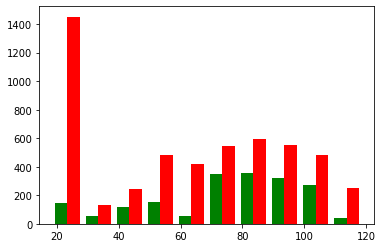

In [290]:
#Data Visualization corrsponding to Churn field based on MonthlyCharges
Mc_churn_yes = df[df.Churn=='Yes'].MonthlyCharges
Mc_churn_no = df[df.Churn=='No'].MonthlyCharges
plt.hist([Mc_churn_yes, Mc_churn_no], color=['green','red'], label=['churn=yes','churn=no'])

In [291]:
# check unique columns
def unique_column_values(df):
    for column in df:
        if df[column].dtype=='object':
            print(f'{column}: {df[column].unique()}')

In [292]:
unique_column_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [293]:
#Replace No internet service,No phone service fieltds value to no
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [294]:
unique_column_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [295]:
#Convert all all Yes, No to 1,0
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [296]:
#Check all values
for col in df:
    print(f'{col}:{df[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [297]:
#Convert all all Female, Male to 1,0
df['gender'].replace({'Female':1,'Male':0},inplace=True)

df.gender.unique()

array([1, 0])

In [298]:
#converts categorical data into dummy or indicator variables
df = pd.get_dummies(data=df, columns=['InternetService', 'PaymentMethod', 'Contract'])

In [299]:
df.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
6685,1,0,1,0,45,1,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
1954,0,0,0,0,1,1,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1739,0,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1232,0,0,1,1,34,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0


In [300]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [301]:
#subtracts the minimum value in the feature and then divides by the range
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [302]:
#check whole datset
for col in df:
    print(f'{col}: {df[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [303]:
#Split churn vs remaining
x = df.drop('Churn',axis='columns')
y = df['Churn']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


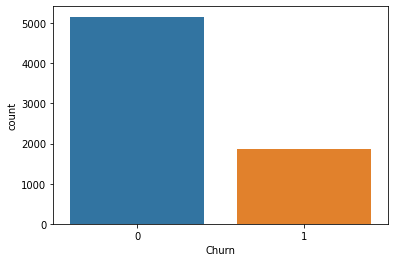

In [304]:
#Check balance of churn fields
import seaborn as sns
sns.countplot(y)

**Balance dataset by applying RandomOverSampler on x,y**

In [305]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
over = RandomOverSampler()
x_s,y_s = over.fit_resample(x_s,y_s)
y.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [306]:
#split into test and train datset
X_train, X_test, y_train, y_test = train_test_split(x_s,y_s,test_size=0.2,random_state=5)

In [307]:
#Check train shape
X_train.shape

(8260, 26)

In [308]:
#Check tes shape
X_test.shape

(2066, 26)

In [309]:
#total number of columns
len(X_test.columns)

26

**Algorithm Comparison**

In [310]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC # "Support vector classifier" 
from sklearn.naive_bayes import GaussianNB  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import GradientBoostingClassifier
classifiers = [
    DecisionTreeClassifier(),
    KNeighborsClassifier(7), 
    SVC(kernel='linear', random_state=0),
    LogisticRegression(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    GaussianNB()
]
names = []
scores = []

for clf in classifiers:
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    names.append(clf.__class__.__name__)
    scores.append(accuracy_score(y_pred, y_test))

score_df = pd.DataFrame({'Model': names, 'Score': scores}).set_index('Model')
score_df

,Score
Model,
DecisionTreeClassifier,0.853340
KNeighborsClassifier,0.753630
SVC,0.722168
LogisticRegression,0.753146
RandomForestClassifier,0.889158
GradientBoostingClassifier,0.767667
GaussianNB,0.734753


**Deep learning Algorithms**

In [311]:
#Apply basic ANN with Keras
ann_model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10,activation = 'relu'),
    # we use sigmoid for binary output
    # output layer
    keras.layers.Dense(1, activation='sigmoid')
])

opt = keras.optimizers.Adam(learning_rate=0.01)

ann_model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

ann_model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
259/259 [==============================] - 1s 2ms/step - loss: 0.5414 - accuracy: 0.7386
Epoch 2/1000
259/259 [==============================] - 1s 2ms/step - loss: 0.4878 - accuracy: 0.7616
Epoch 3/1000
259/259 [==============================] - 0s 2ms/step - loss: 0.4817 - accuracy: 0.7642
Epoch 4/1000
259/259 [==============================] - 0s 2ms/step - loss: 0.4764 - accuracy: 0.7688
Epoch 5/1000
259/259 [==============================] - 0s 2ms/step - loss: 0.4742 - accuracy: 0.7705
Epoch 6/1000
259/259 [==============================] - 0s 2ms/step - loss: 0.4705 - accuracy: 0.7717
Epoch 7/1000
259/259 [==============================] - 0s 2ms/step - loss: 0.4682 - accuracy: 0.7740
Epoch 8/1000
259/259 [==============================] - 0s 2ms/step - loss: 0.4645 - accuracy: 0.7743
Epoch 9/1000
259/259 [==============================] - 0s 2ms/step - loss: 0.4626 - accuracy: 0.7770
Epoch 10/1000
259/259 [==============================] - 1s 2ms/step - loss: 0.459

In [312]:
#evaluate model on test set
ann_model.evaluate(X_test, y_test)

65/65 [==============================] - 0s 1ms/step - loss: 0.8108 - accuracy: 0.8258


[0.810825765132904, 0.8257502317428589]

In [313]:
#predict model on test set
y_pred = ann_model.predict(X_test)
y_pred[:5]

array([[3.2680500e-01],
       [1.1361418e-07],
       [5.5724317e-01],
       [6.8710792e-01],
       [5.4457883e-09]], dtype=float32)

In [314]:
# predict ANN model
y_pred = ann_model.predict(X_test)
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [315]:
y_pred[:10]

[1, 0, 1, 1, 0, 1, 0, 0, 0, 0]

In [316]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81      1025
           1       0.79      0.88      0.83      1041

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



Text(69.0, 0.5, 'Truth')

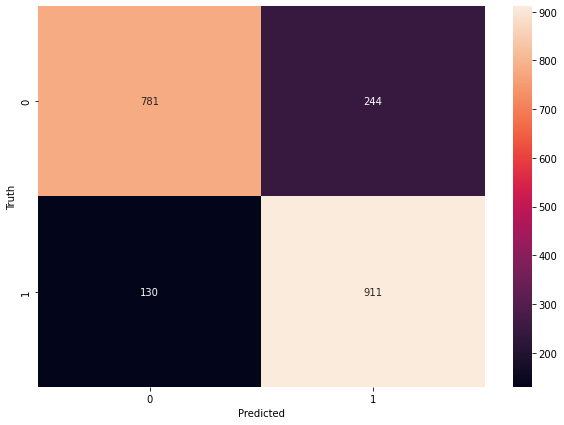

In [317]:
#confusion_matrix for ann model
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Hyper Parameter tuning - ANN**

In [318]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid

#create Hyper Parameter ANN model
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
            
    model.add(Dense(units =1 , activation = 'sigmoid')) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, verbose=0)


layers = [(26,), (20, 20), (15, 15)]
activations = ['sigmoid', 'relu']
param_grids = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grids,cv=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


In [319]:
grid_result=grid.fit(X_train, y_train)
[grid_result.best_score_,grid_result.best_params_]

[0.768159806728363,
 {'activation': 'relu', 'batch_size': 256, 'epochs': 30, 'layers': (26,)}]

**FLASK API**

In [ ]:
#Dump the ann model model in local

import joblib
#from sklearn.externals import joblib
import pickle

joblib.dump(ann_model, "ann_model.pkl")
# creating the app
import requests
from flask import Flask

from flask import request

app = Flask(__name__)

@app.route("/predict", methods=['POST'])
def predict():
            data = request.get_json()
            data1 = json_normalize(data)
            scaled_data=scaler.transform(data1)

            x_pca=p_c_a.transform(scaled_data)
             
            clf = joblib.load("./ann_model.pkl")

            return str(clf.predict(x_pca))
           
if __name__ == "__main__":
    #app.run(debug=False, host='0.0.0.0', port=5000)
    app.run(debug=False, host='127.0.0.1', port=5000)

INFO:tensorflow:Assets written to: ram://b4c26f61-6789-4364-9a36-7a075035a02a/assets
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
